# MACHINE LEARNING 4 Assignment

In [108]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare 
#to predict whether a passenger survived.

In [159]:
#Read from the dataset
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [110]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
#Check for the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
titanic.shape

(891, 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14636870>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14592450>]], dtype=object)

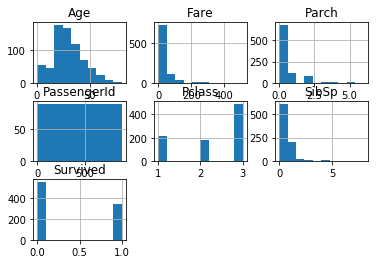

In [113]:
titanic.hist()

In [114]:
#Looking for columns with null values
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [115]:
#Age has significant amount of NaNs in order to drop.177/891 = approx 20%
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [160]:
#we see three columns having the null values.
#Since the requirement is to use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare 
#to predict whether a passenger survived.

#we will replace missing age using the Passenger class and Siblings aboard columns to arrive at the median value for age
age_null = titanic.Age.isnull()
group_med_age = titanic.pivot_table(values = 'Age', index = ['Pclass', 'SibSp'], aggfunc = 'median')
group_med_age
titanic.loc[age_null, 'Age'] = titanic.loc[age_null, ['Pclass', 'SibSp']].apply(  \
    lambda x: group_med_age.loc[(group_med_age.index.get_level_values('Pclass') == x.Pclass) & \
                                (group_med_age.index.get_level_values('SibSp') == x.SibSp)].Age.values[0], axis = 1)

In [161]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              7
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [162]:
#We figure that there are stil some NaNs present. We will drop them as they should be insignificant in terms of overall %
titanic.dropna(subset=['Age'],inplace=True)

In [163]:
#Replace the 'Sex' column with 0s and 1s instead of the male and female
label = preprocessing.LabelEncoder()
titanic['Sex'] = label.fit_transform(titanic.Sex)
print (titanic['Sex'].head())

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32


In [164]:
#dropping the other not useful columns & deriving the X(List of independent variables)
X=titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked'],axis=1)
X.shape

(884, 6)

In [165]:
# getting the Dependent variable values
y=pd.DataFrame(titanic['Survived'].astype(int))
y.shape

(884, 1)

In [166]:
#Prepare the Train and Test data
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.3,random_state=0)

In [167]:
#derive the Logistic Model
lgR=LogisticRegression()
lgR.fit(X_Train,y_Train)

C:\Users\shrik\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
#Predict using the Test data
predicted=lgR.predict(X_Test)
print(predicted)

[1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 1]


In [169]:
#Derive the Accuracy score
metrics.accuracy_score(y_Test,predicted)

0.79323308270676696